In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [3]:
# Load Datasets

Train_df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Naive Bayes\SalaryData_Train.csv")
Test_df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Naive Bayes\SalaryData_Test.csv")

In [6]:
Train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
Test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

le = LabelEncoder()
for col in Train_df.columns:
    if Train_df[col].dtype == 'object':
        Train_df[col] = le.fit_transform(Train_df[col])
        Test_df[col] = le.transform(Test_df[col])

In [9]:
Train_df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481,0.248931
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430,0.432401
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [10]:
Test_df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,10.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596,0.245684
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922,0.430506
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


In [11]:
Train_df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
Test_df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [14]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


### EDA

<Axes: xlabel='workclass', ylabel='count'>

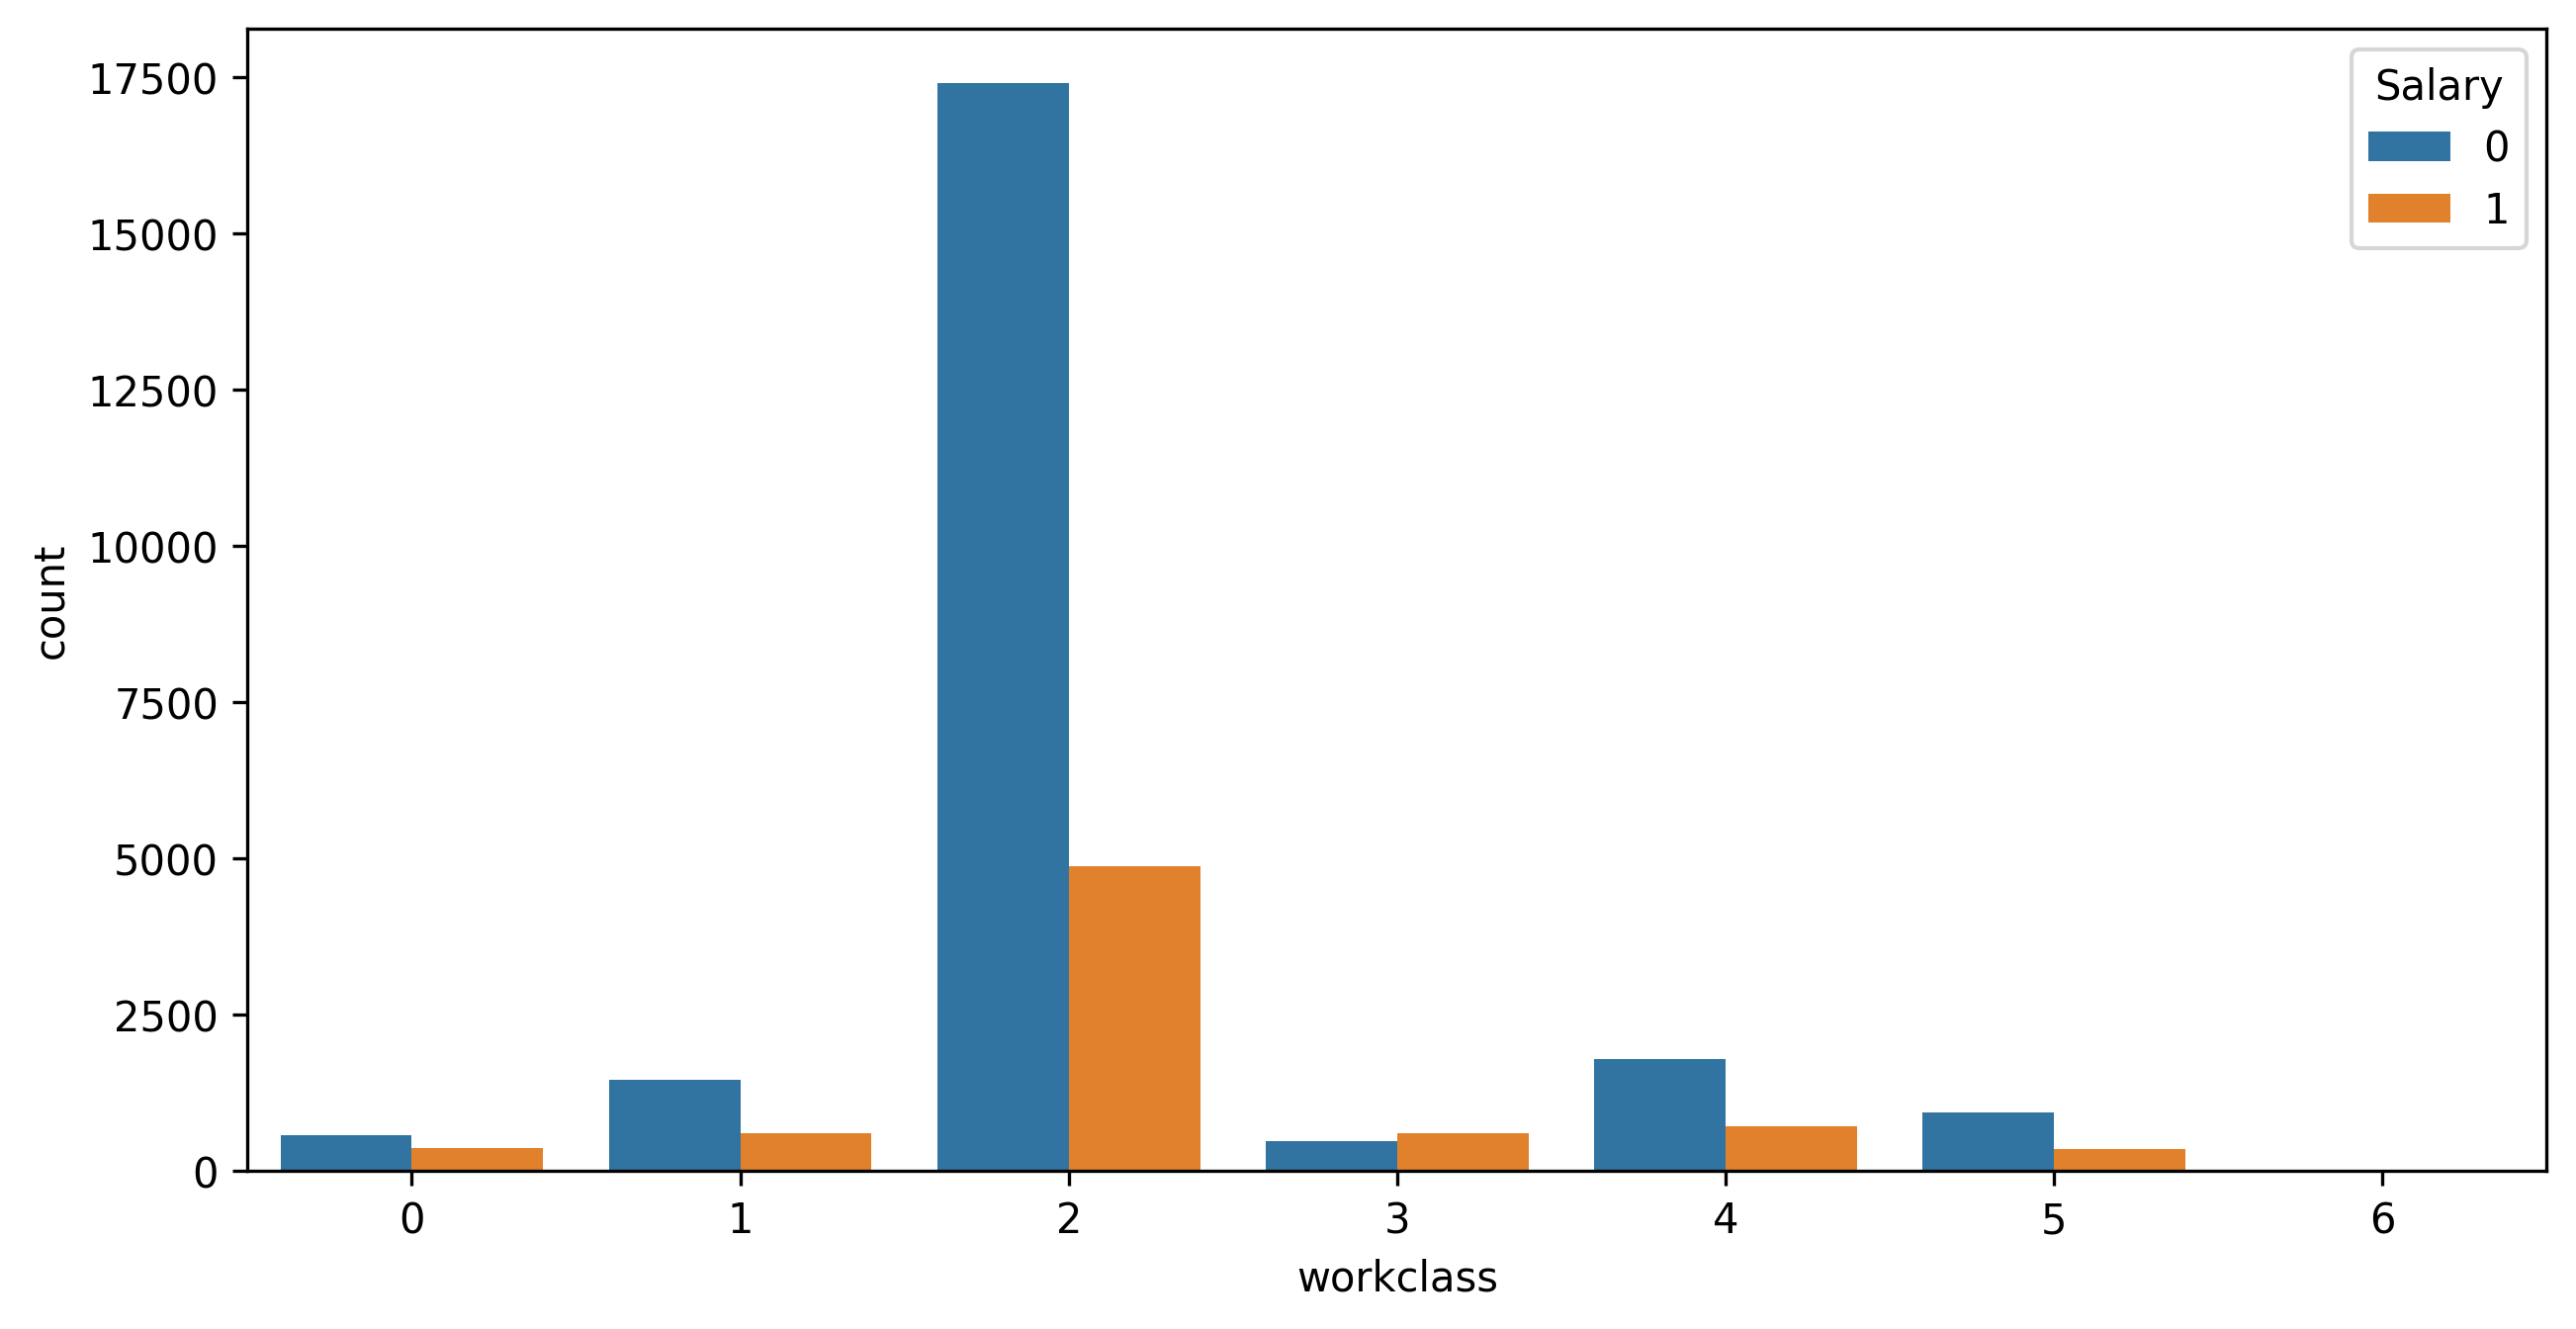

In [15]:
sns.countplot(data=Train_df, x='workclass', hue='Salary')

<Axes: xlabel='occupation', ylabel='count'>

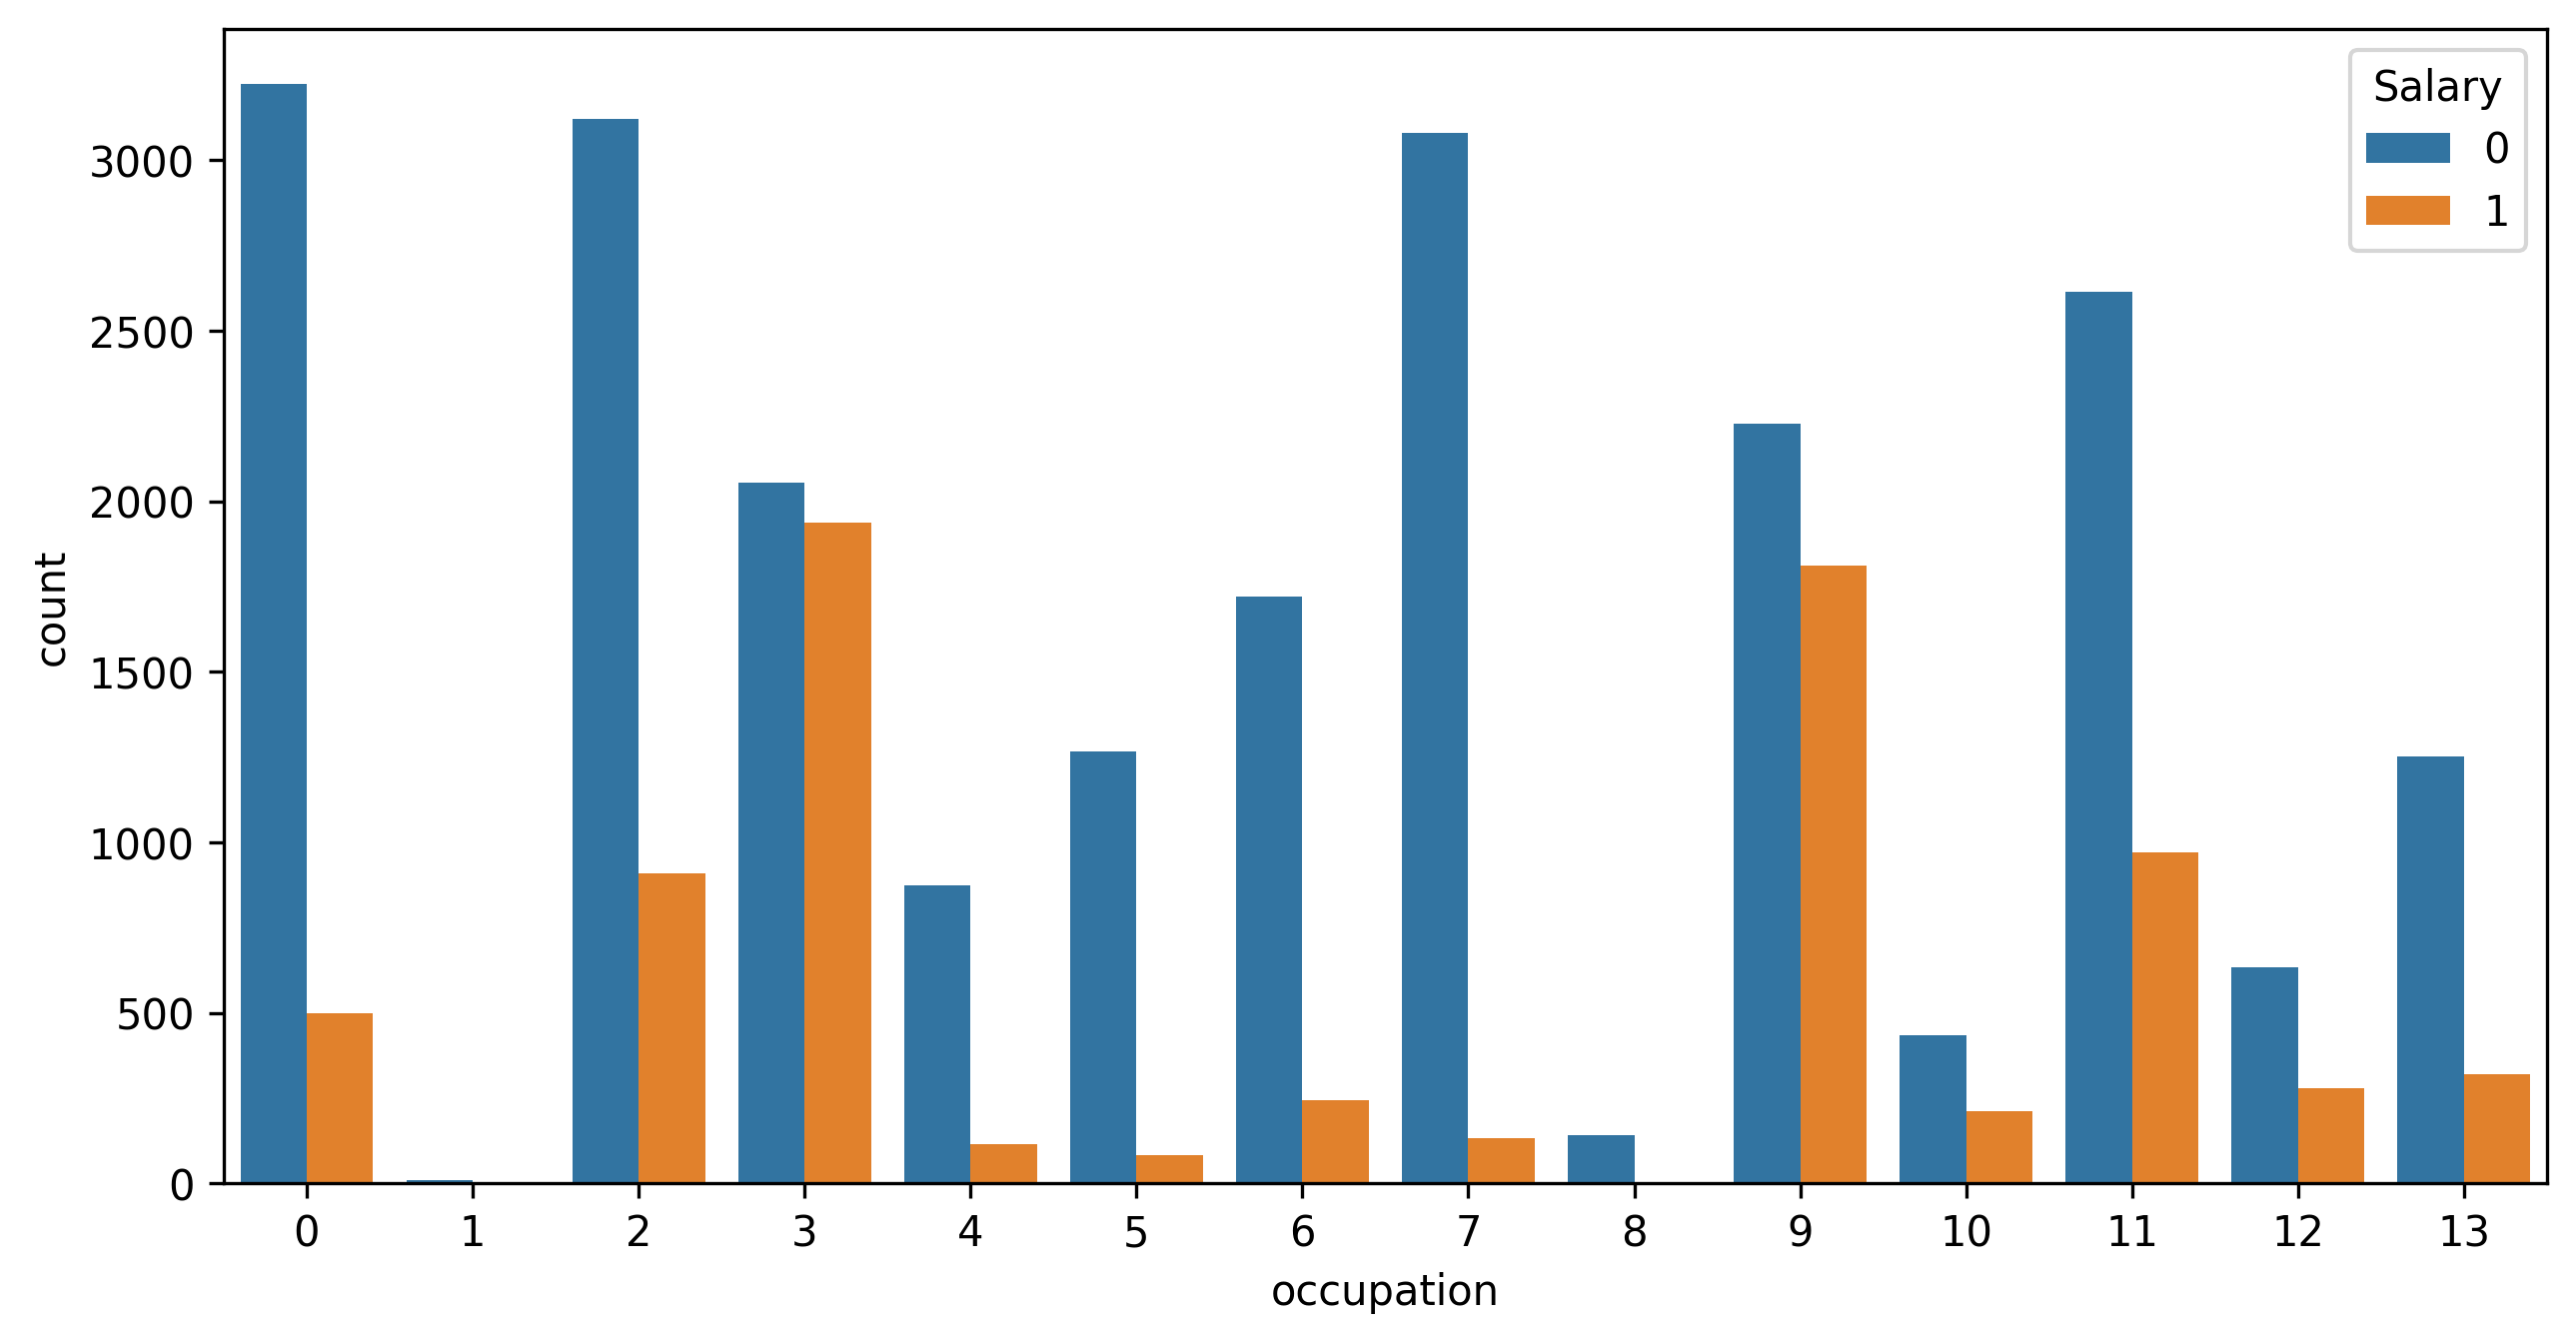

In [16]:
sns.countplot(x='occupation', hue='Salary', data=Train_df)

<Axes: xlabel='count', ylabel='occupation'>

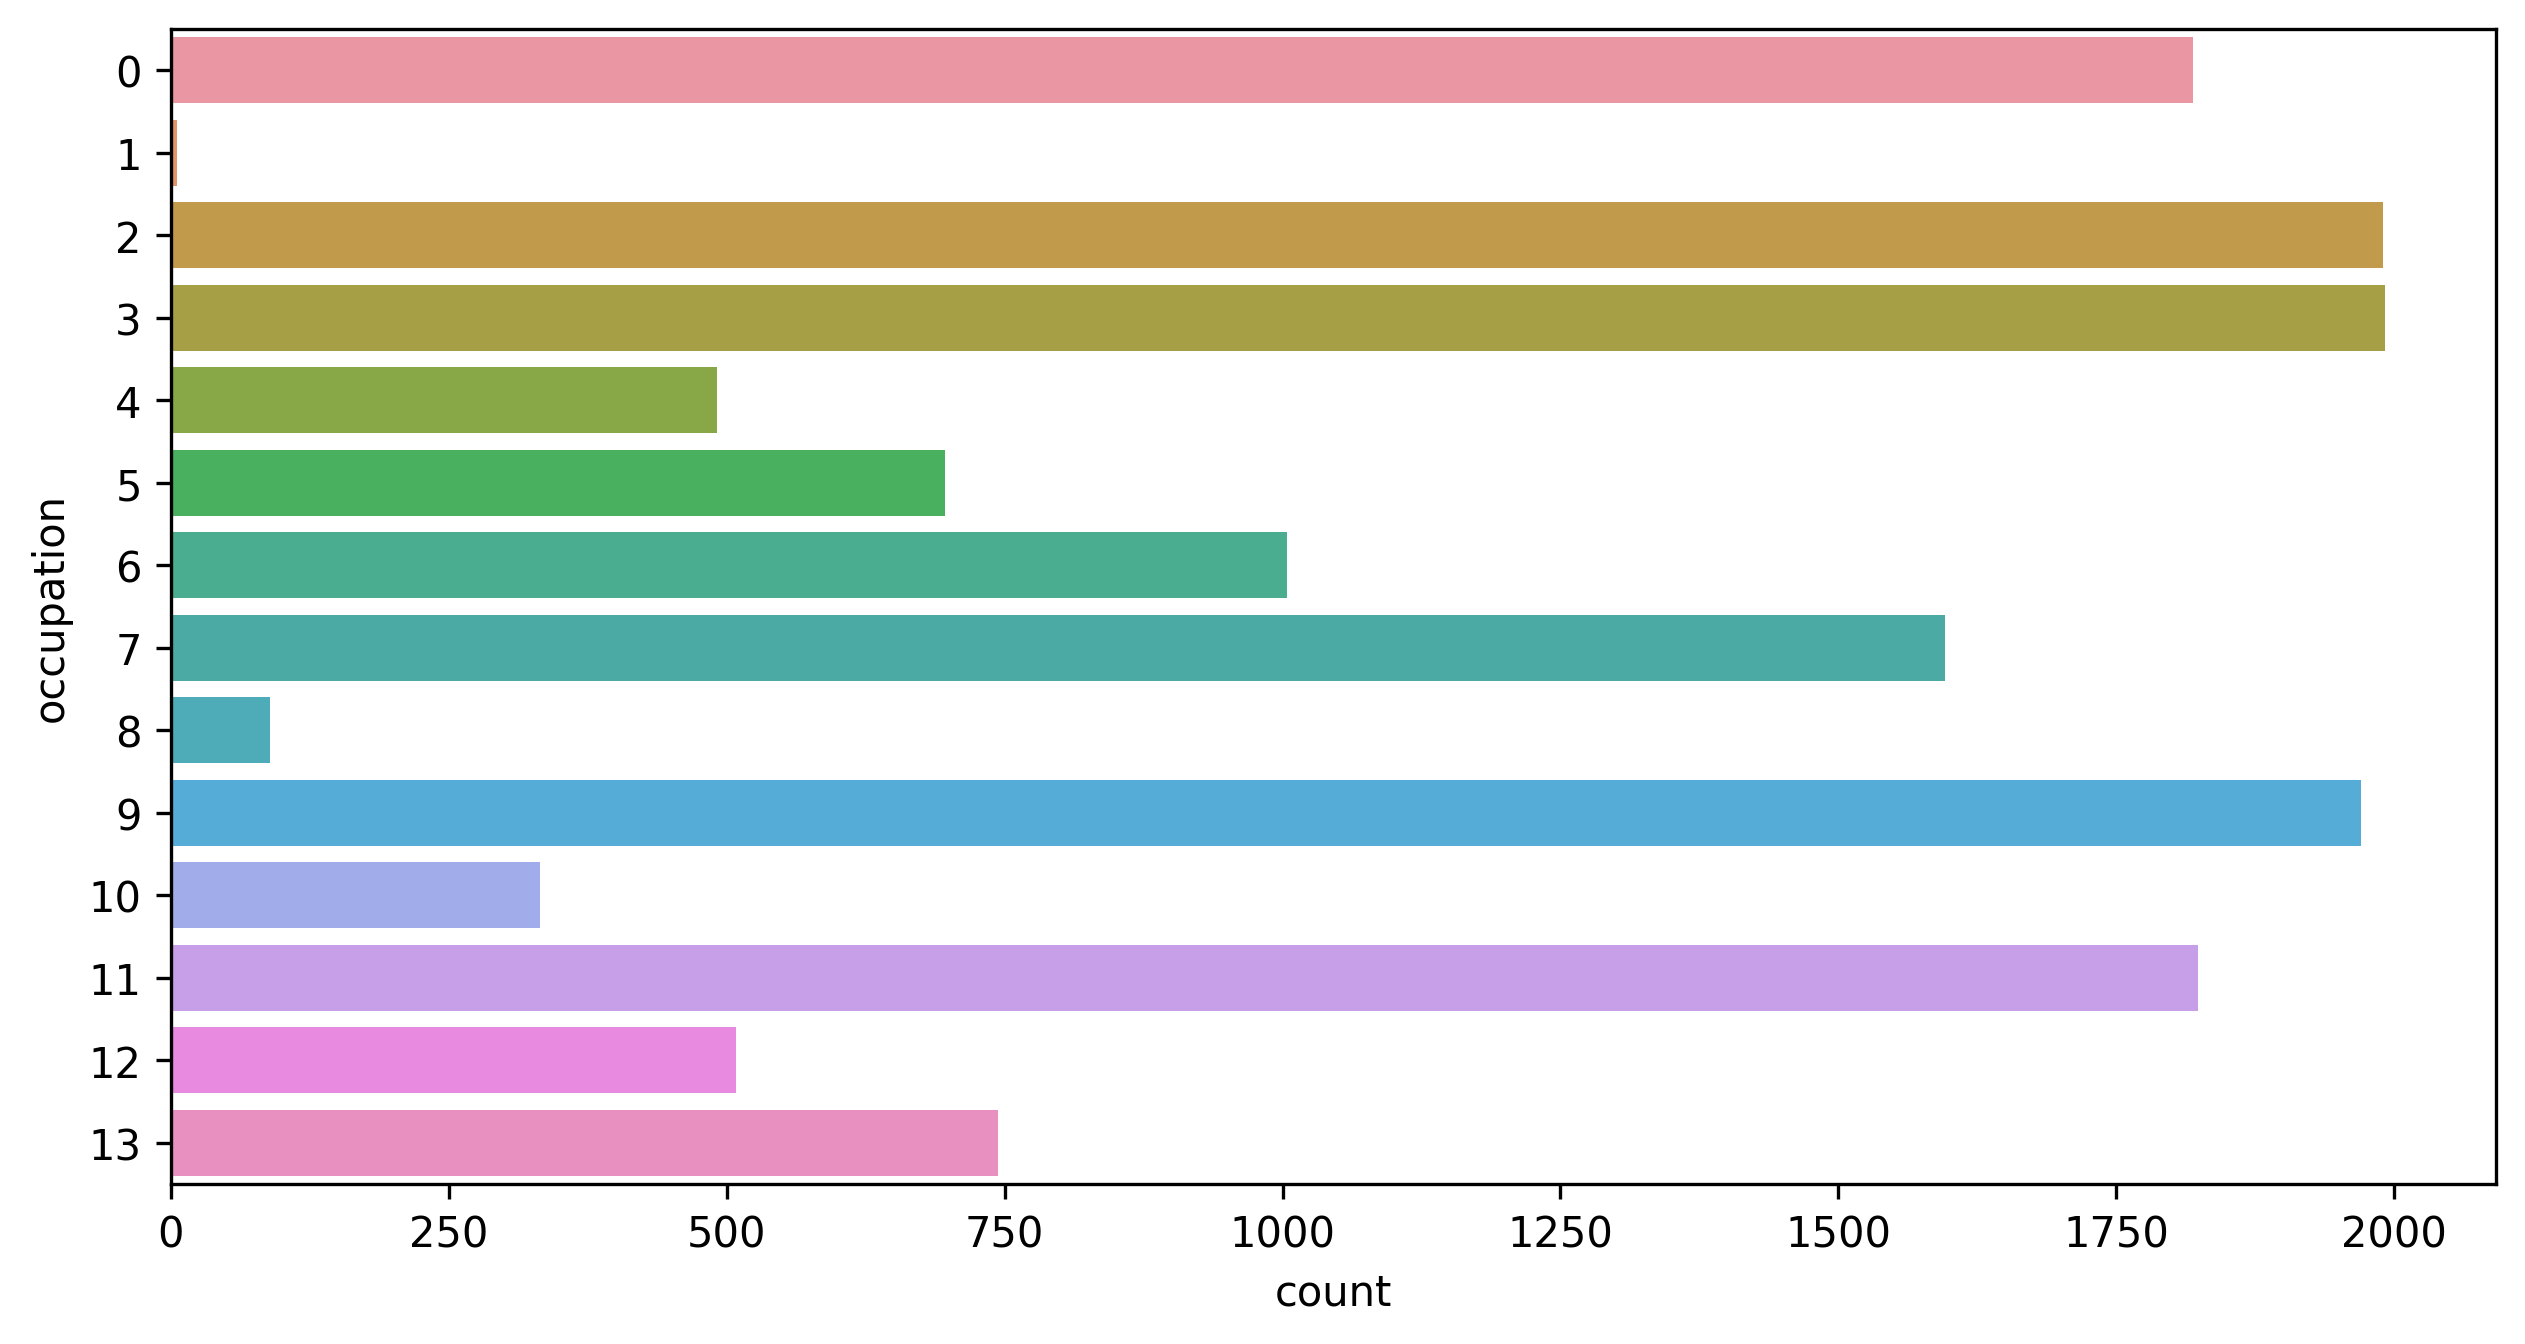

In [17]:
sns.countplot(y='occupation', data=Test_df)

In [18]:
# Spliting the Data into 'Training' & 'Testing'

from sklearn.model_selection import train_test_split

xtrain = Train_df.drop(columns = 'Salary')
ytrain = Train_df['Salary']
xtest = Test_df.drop(columns = 'Salary')
ytest = Test_df['Salary']

xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)

In [21]:
print(f"xtrain :", xtrain.shape)
print(f"ytrain :", ytrain.shape)
print(f"xtest :", xtest.shape)
print(f"ytest :", ytest.shape)

xtrain : (24128, 13)
ytrain : (24128,)
xtest : (6033, 13)
ytest : (6033,)


### Model Building

#### GaussianNB Model

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb_pred = gnb.predict(xtest)

print(f"Training Accuracy :", gnb.score(xtrain, ytrain))
print(f"Testing Accuracy :", gnb.score(xtest, ytest))
print(f"Training Accuracy :", classification_report(ytest, gnb_pred))

Training Accuracy : 0.7968335543766578
Testing Accuracy : 0.7908171722194597
Training Accuracy :               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4490
           1       0.69      0.33      0.44      1543

    accuracy                           0.79      6033
   macro avg       0.75      0.64      0.66      6033
weighted avg       0.78      0.79      0.76      6033



#### MultinomialNB Model

In [23]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
mnb_pred = mnb.predict(xtest)

print(f"Training Accuracy :", mnb.score(xtrain, ytrain))
print(f"Testing Accuracy :", mnb.score(xtest, ytest))
print(f"Training Accuracy :", classification_report(ytest, mnb_pred))

Training Accuracy : 0.7741627984084881
Testing Accuracy : 0.7679429802751533
Training Accuracy :               precision    recall  f1-score   support

           0       0.78      0.96      0.86      4490
           1       0.64      0.21      0.31      1543

    accuracy                           0.77      6033
   macro avg       0.71      0.58      0.59      6033
weighted avg       0.74      0.77      0.72      6033

